# 🧠 Handwritten Digit Recognition with Deep Learning

## 📘 Introduction

In the digital age, automating data entry from physical documents is a powerful tool for increasing productivity. One common use-case is the recognition of handwritten digits, such as those found on receipts, forms, or invoices. Deep learning, particularly neural networks, has proven highly effective in image classification tasks like this. 

This project focuses on building a deep learning model that can accurately classify handwritten digits using the MNIST dataset—a well-known benchmark in the field of computer vision. The dataset consists of 70,000 grayscale images (28x28 pixels), each representing a single digit from 0 to 9.

---

## 🧩 Problem Statement

A startup is developing a mobile application to scan handwritten receipts and automatically log expenses. Your task as a data scientist is to build and train a deep learning model that can accurately classify handwritten digits captured by the app. The model will be trained using the MNIST dataset and should be able to generalize well to real-world handwriting variations.

---

## 🛠️ Need to Solve

Accurate digit recognition is critical for reducing manual data entry and improving user experience. A robust and efficient classification model will:
- Enable the app to log expenses automatically and instantly.
- Reduce errors from human data entry.
- Serve as a foundation for more advanced handwriting recognition features.

This notebook walks through the entire process: from loading the MNIST data, preprocessing it, building and training a neural network, to evaluating its performance and suggesting improvements.



## 🛠️ Step a: Importing Required Libraries

We begin by importing the essential libraries needed for this deep learning project:

- `numpy`: For numerical operations and array handling.
- `tensorflow`: A powerful deep learning framework used to build and train neural networks.
- `tensorflow.keras.datasets.mnist`: Provides direct access to the MNIST handwritten digit dataset.
- `tensorflow.keras.models.Sequential`: Used to create a linear stack of layers for our neural network.
- `tensorflow.keras.layers`: Includes different types of layers such as `Dense`, `Flatten`, and `Dropout` used in the model architecture.
- `tensorflow.keras.utils.to_categorical`: A utility function to one-hot encode the labels.
- `matplotlib.pyplot`: For visualizing training performance and data samples.


In [5]:
# a. Import the libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## 🖼️ Visualizing Sample Images from the MNIST Training Set

Before training our model, it's helpful to visually inspect some of the data to understand what we're working with.

In this step:
- We randomly select and display 9 handwritten digit images from the training set.
- Each image is reshaped from a 1D array back to its original 28x28 pixel format for visualization.
- We use `matplotlib` to plot these images in a 3x3 grid.
- The corresponding label (digit) is displayed as the title above each image.

This quick visualization helps confirm that the data is loaded correctly and provides insight into the variation in handwriting styles that the model must learn to classify.


## 📥 Step b: Loading and Preprocessing the MNIST Dataset

In this step:
- We load the MNIST dataset using TensorFlow's built-in `mnist.load_data()` function.
- The dataset is automatically split into two sets:
  - `x_train` and `y_train` for training the model.
  - `x_test` and `y_test` for evaluating the model.

Each image in `x_train` and `x_test` is a 28x28 pixel grayscale image representing a handwritten digit.
The labels (`y_train` and `y_test`) are integers from 0 to 9, corresponding to the digit shown in each image.

This dataset forms the foundation for training and testing our deep learning model.


In [8]:
# b. Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

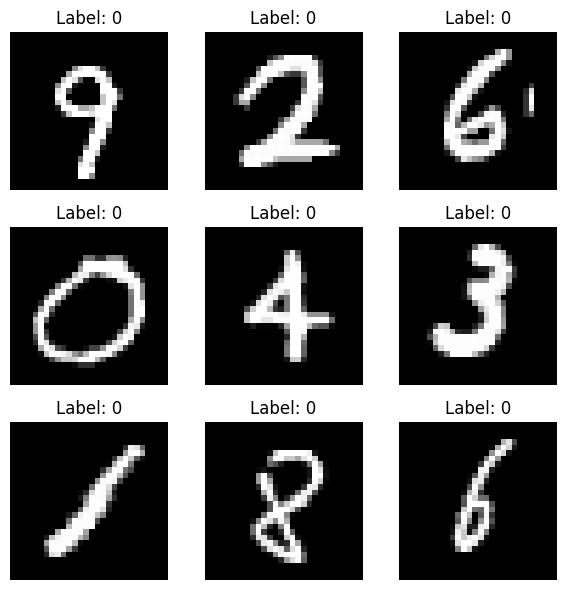

In [9]:
# View some sample images from the training set
import matplotlib.pyplot as plt

# Display 9 random images from the training data
plt.figure(figsize=(6, 6))
for i in range(9):
    index = np.random.randint(0, x_train.shape[0])
    image = x_train[index].reshape(28, 28)
    label = np.argmax(y_train[index])
    plt.subplot(3, 3, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## 🔄 Step c: Normalizing the Images

Neural networks perform better when input features are scaled to a consistent range.

In this step:
- We normalize the pixel values of the images from the original range [0, 255] to the range [0, 1].
- This is done by dividing each pixel value by 255.0.

Normalization helps the model converge faster during training and improves overall performance by ensuring that all input features contribute equally.


In [10]:
# c. Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### Step d: Reshape for the Dense Model (Flatten the 2D 28x28 Images)

Since the model we'll use is a fully connected (dense) neural network, we need to flatten the 2D image into a 1D vector of 784 pixels (28x28). This is necessary because the dense layers expect a 1D input.

In the case of convolutional neural networks (CNNs), we would keep the 2D structure, but for a basic feedforward model, flattening is a required preprocessing step.

Let's flatten the input images into vectors.


In [11]:
# d. Flatten the 2D 28x28 images to 1D 784 vector
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

### Step e: One-hot Encode the Labels

The MNIST dataset labels are integers (0 to 9), but for training a neural network, we typically need to one-hot encode the labels. One-hot encoding transforms the labels into a binary matrix where each class is represented by a vector. For example, the label `3` will be represented as `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`, indicating the 3rd class.

We will use Keras' `to_categorical` function to one-hot encode the labels.


In [12]:
# e. One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Step f: Build a Simple Feedforward Neural Network

Now that we've preprocessed the data, let's build a simple feedforward neural network (also known as a multi-layer perceptron). This model will consist of:

- **Input layer**: The flattened 784 features (pixels).
- **Hidden layers**: A couple of fully connected (dense) layers with ReLU activation.
- **Output layer**: A dense layer with 10 units (one for each digit) and a softmax activation function, which is ideal for multi-class classification tasks.

We'll start with a basic architecture and tune it later if necessary.


In [13]:
# f. Build a simple feedforward neural network
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),      # Input layer + 1st hidden layer
    Dropout(0.2),                                            # Regularization to reduce overfitting
    Dense(256, activation='relu'),                          # 2nd hidden layer
    Dropout(0.2),
    Dense(128, activation='relu'),                          # 3rd hidden layer
    Dense(10, activation='softmax')                         # Output layer (10 classes)
])

C:\python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step g: Compile the Model

Before we can train the model, we need to compile it. This involves specifying:

- **Loss function**: Since we're dealing with a classification problem, we'll use `categorical_crossentropy`, which is commonly used for multi-class classification tasks.
- **Optimizer**: We'll use `adam`, which is a popular optimizer for deep learning tasks due to its efficiency.
- **Metrics**: We'll use `accuracy` to evaluate the model's performance during training.

Let's compile the model now.


In [14]:
# g. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Show model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

### Step h: Train the Model

Now that we have compiled the model, it's time to train it. We'll use the training data (`X_train_flattened` and `y_train_one_hot`) and train the model for a specified number of epochs. 

We'll also provide a validation set, which will be used to evaluate the model's performance on unseen data after each epoch. This helps in understanding if the model is overfitting or underfitting.

Let’s train the model for 10 epochs and use a batch size of 32.


In [16]:
# h. Train the model
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=2)

Epoch 1/15
375/375 - 5s - 14ms/step - accuracy: 0.9082 - loss: 0.3046 - val_accuracy: 0.9664 - val_loss: 0.1176
Epoch 2/15
375/375 - 3s - 9ms/step - accuracy: 0.9646 - loss: 0.1181 - val_accuracy: 0.9724 - val_loss: 0.0897
Epoch 3/15
375/375 - 4s - 10ms/step - accuracy: 0.9729 - loss: 0.0847 - val_accuracy: 0.9722 - val_loss: 0.0925
Epoch 4/15
375/375 - 4s - 10ms/step - accuracy: 0.9795 - loss: 0.0671 - val_accuracy: 0.9759 - val_loss: 0.0810
Epoch 5/15
375/375 - 4s - 9ms/step - accuracy: 0.9812 - loss: 0.0592 - val_accuracy: 0.9783 - val_loss: 0.0836
Epoch 6/15
375/375 - 3s - 8ms/step - accuracy: 0.9851 - loss: 0.0461 - val_accuracy: 0.9768 - val_loss: 0.0834
Epoch 7/15
375/375 - 3s - 9ms/step - accuracy: 0.9859 - loss: 0.0444 - val_accuracy: 0.9767 - val_loss: 0.0805
Epoch 8/15
375/375 - 3s - 8ms/step - accuracy: 0.9881 - loss: 0.0358 - val_accuracy: 0.9790 - val_loss: 0.0788
Epoch 9/15
375/375 - 3s - 8ms/step - accuracy: 0.9893 - loss: 0.0317 - val_accuracy: 0.9776 - val_loss: 0.093

### Step i: Evaluate the Model

After training the model, it's important to evaluate its performance on the test dataset (`X_test_flattened` and `y_test_one_hot`). This allows us to see how well the model generalizes to new, unseen data.

We will use the `evaluate()` function, which returns the loss and accuracy of the model on the test data.

Let's evaluate the model now.


In [17]:
# i. Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\n🎯 Test Accuracy: {test_accuracy*100:.2f}%")

313/313 - 1s - 2ms/step - accuracy: 0.9808 - loss: 0.0804

🎯 Test Accuracy: 98.08%


In [18]:
# Optional: Plot training history
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

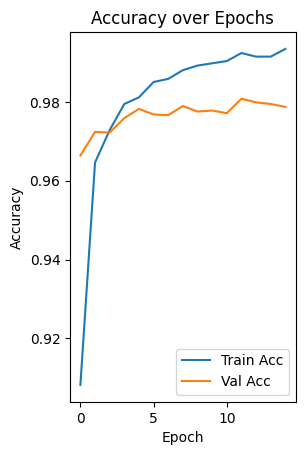

In [19]:
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

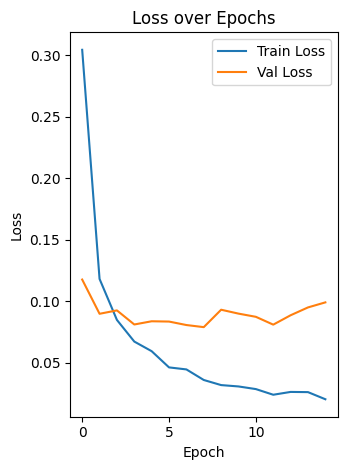

In [20]:
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


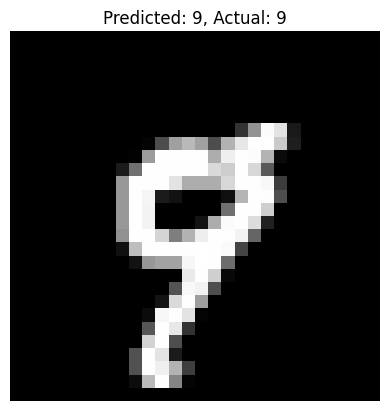

In [24]:
# Select a random test image
random_index = np.random.randint(0, x_test.shape[0])
test_image = x_test[random_index].reshape(1, 784)  # Reshape for prediction
true_label = np.argmax(y_test[random_index])       # Actual label

# Predict using the trained model
prediction = model.predict(test_image)
predicted_label = np.argmax(prediction)

# Display the image and the prediction
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {true_label}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


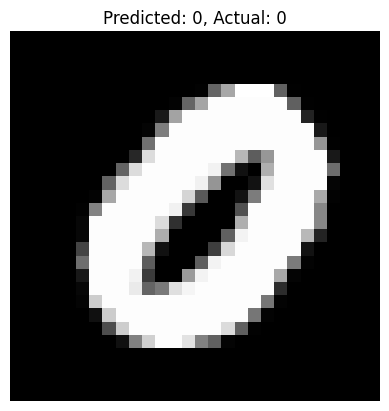

In [25]:
# Select a random test image
random_index = np.random.randint(0, x_test.shape[0])
test_image = x_test[random_index].reshape(1, 784)  # Reshape for prediction
true_label = np.argmax(y_test[random_index])       # Actual label

# Predict using the trained model
prediction = model.predict(test_image)
predicted_label = np.argmax(prediction)

# Display the image and the prediction
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {true_label}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


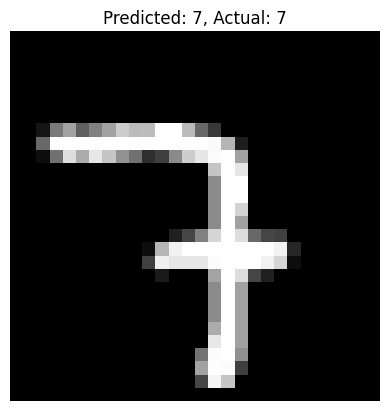

In [26]:
# Select a random test image
random_index = np.random.randint(0, x_test.shape[0])
test_image = x_test[random_index].reshape(1, 784)  # Reshape for prediction
true_label = np.argmax(y_test[random_index])       # Actual label

# Predict using the trained model
prediction = model.predict(test_image)
predicted_label = np.argmax(prediction)

# Display the image and the prediction
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {true_label}")
plt.axis('off')
plt.show()
